# Design of Experiments Homework 3

> $$Abstract$$
> This note is created to mark the second homework of DoE.   
> The problems are from the book "*Design of Experiments*" by Douglas C. Montgomery, with solutions completed by myself with applications of *Python* and *R*.

## 4.8
>   A consumer products company relies on direct mail marketing pieces as a major component of its advertising campaigns. The company has three different designs for a new brochure and wants to evaluate their effectiveness, as there are substantial differences in costs between the three designs. The company decides to test the three designs by mailing 5000 samples of each to potential customers in four different regions of the country. Since there are known regional differences in the customer base,regions are considered as blocks. The number of responses to each mailing is as follows.
> ***
>$$\text{Table is Shown Below}$$
> ***
> - (a) Analyze the data from this experiment.
> - (b) Use the Fisher LSD method to make comparisons among the three designs to determine specificallywhich designs differ in the mean response rate. 
> - (c) Analyze the residuals from this experiment.


250 350 219 375\\
400 525 390 580\\
275 340 200 310


Fisrt of all we use Python for data gaining.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = np.array([250, 350, 219, 375, 
400, 525, 390, 580, 
275, 340, 200, 310])

In [ ]:
treatments = np.array([1,1,1,1,2,2,2,2,3,3,3,3])
blocks = np.array([1,2,3,4,1,2,3,4,1,2,3,4])

In [ ]:
X = np.vstack((treatments, blocks, data.T))


In [ ]:
X

array([[  1,   1,   1,   1,   2,   2,   2,   2,   3,   3,   3,   3],
       [  1,   2,   3,   4,   1,   2,   3,   4,   1,   2,   3,   4],
       [250, 350, 219, 375, 400, 525, 390, 580, 275, 340, 200, 310]])

In [ ]:
X = pd.DataFrame(X.T, columns=['treatments', 'blocks', 'data'])

In [ ]:
X

,treatments,blocks,data
0,1,1,250
1,1,2,350
2,1,3,219
3,1,4,375
4,2,1,400
5,2,2,525
6,2,3,390
7,2,4,580
8,3,1,275
9,3,2,340


In [ ]:
X.to_csv('example4.8.csv', index= False)

接下来换成R

### (a)
> Analyze the data from this experiment.

In [ ]:
X = read.csv('example4.8.csv')

In [ ]:
X

treatments,blocks,data
<int>,<int>,<int>
1,1,250
1,2,350
1,3,219
1,4,375
2,1,400
2,2,525
2,3,390
2,4,580
3,1,275


In [ ]:
X_aov = aov(data~ factor(treatments)+ factor(blocks), X)
summary(X_aov)

                   Df Sum Sq Mean Sq F value  Pr(>F)    
factor(treatments)  2  90755   45378   50.15 0.00018 ***
factor(blocks)      3  49036   16345   18.07 0.00208 ** 
Residuals           6   5429     905                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

We get the result of ANOVA.

Here the $F_0$ is 50.15.

$切Python$

In [ ]:
90775+ 49036+ 5429

145240

***
方差来源 | 平方和 | 自由度 | 均方 | $F_0$ | p值
***
Treatment | 90775 | 2 | 45378 | **50.15** <br>
blocks | 49036 | 3 | 16345 | <br>
error | 5429 | 6 | 905 | <br>
total | 145240 | 11 |<br>

Hypothesis testing:<br>
$$
H_0: \mu_1 = \mu_2= \mu_3 \quad vs\quad H_1: not\space H_0
$$
At the level of $99\% >p \space value$, we can reject $H_0$.<br>
There's some difference.

### (b)
> Use the Fisher LSD method to make comparisons among the three designs to determine specifically which designs differ in the mean response rate.

In [1]:
import numpy as np

In [2]:
data = np.array([[250, 350, 219, 375],
                 [400, 525, 390, 580],
                 [275, 340, 200, 310]])

In [4]:
X_bar = data.mean(axis=1)
X_bar

array([298.5 , 473.75, 281.25])

Hypothesis testing:<br>
$$
H_0: \mu_i = \mu_j \quad vs\quad H_1: \mu_i \neq \mu_j
$$<br>
for $i,j = 1,2,3$

We get $\bar{x}_{1.}, \bar{x}_{2.} \bar{x}_{3.}$<br>
$LSD= t_{\alpha /2, N-a}$

In [5]:
from scipy import stats

In [6]:
MSE = 905
alpha = 0.1
LSD = stats.t.ppf(1-alpha/2, 6)*np.sqrt(MSE*(1/4+1/4))

In [7]:
LSD

41.33542300441094

#### $i,j = 1, 2$

In [8]:
np.abs(X_bar[0]-X_bar[1]) > LSD

True

#### $i,j = 1, 3$

In [9]:
np.abs(X_bar[0]-X_bar[2]) > LSD

False

#### $i,j = 2, 3$

In [10]:
np.abs(X_bar[2]-X_bar[1]) > LSD

True

Now we reject $H_0$ for $i,j = 1, 2\space and \space i,j = 2, 3$.<br>
At the confidence level of 90%, we can say that 
$$
\mu_1 \neq \mu_2 \quad and \quad \mu_2 \neq \mu_3
$$

### (c)

> Analyze the residuals from this experiment

In [ ]:
X = data

In [ ]:
X

array([[250, 350, 219, 375],
       [400, 525, 390, 580],
       [275, 340, 200, 310]])

In [ ]:
X_mean = X.mean(axis=1)

In [ ]:
residuals_1 = X[0]-X_mean[0]
residuals_2 = X[1]-X_mean[1]
residuals_3 = X[2]-X_mean[2]

residual_all = np.concatenate((residuals_1, residuals_2, residuals_3))

#### Normality

In [ ]:
residuals = np.concatenate((residuals_1, residuals_2, residuals_3))

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([-83.75, -81.25, -79.5 , -73.75, -48.5 ,  -6.25,  28.75,  51.25,
          51.5 ,  58.75,  76.5 , 106.25])),
 (72.3368699108162, 2.677001950143428e-15, 0.953134231513351))

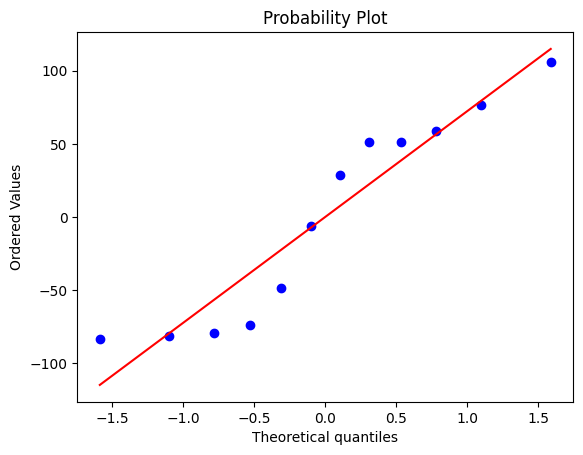

In [ ]:
import matplotlib.pyplot as plt
stats.probplot(residual_all, plot = plt)

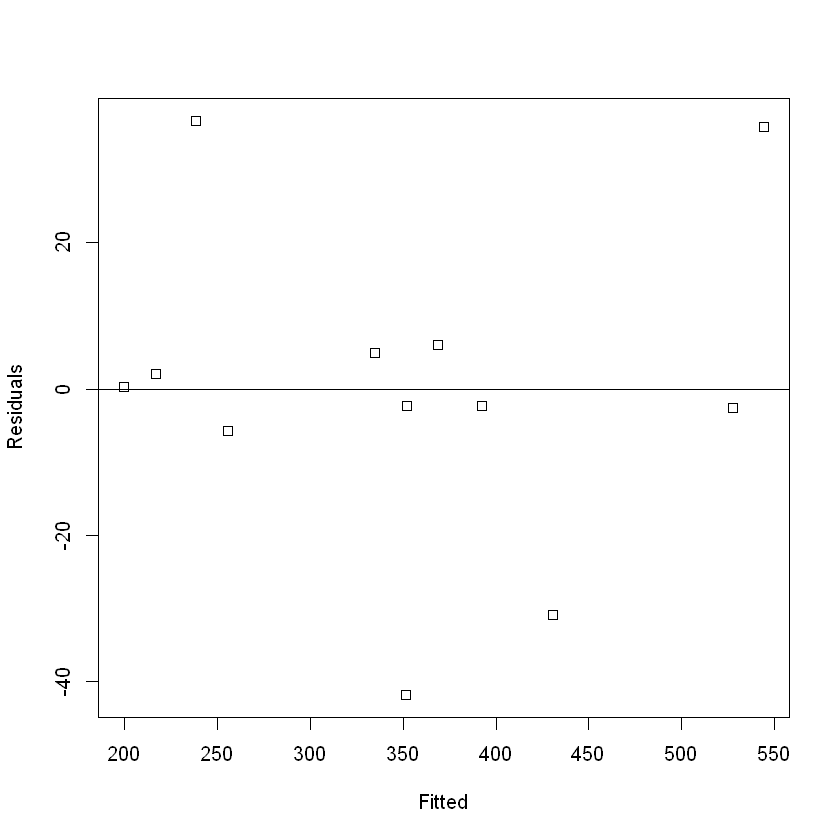

In [ ]:
X_aov_res = residuals(X_aov)
X_aov_fitted = fitted.values(X_aov)

plot(X_aov_fitted, X_aov_res, 
xlab = "Fitted", ylab = "Residuals", pch = 0)
abline(h = 0)

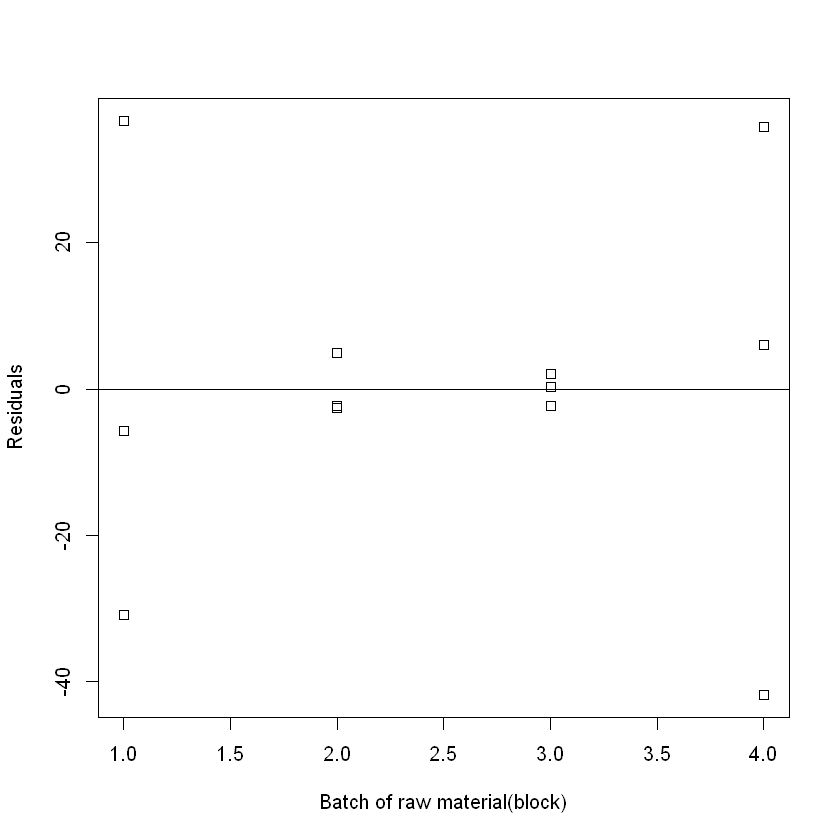

In [ ]:
plot(as.numeric(X$blocks), X_aov_res,
 xlab = "Batch of raw material(block)", ylab = "Residuals", pch = 0)
abline(h = 0)

We can not find certain pattern of the plot.

## 4.12

>  4.12. An article in Nature Genetics (2003,Vol. 34, pp.
 85–90) “Treatment-Specific Changes in Gene Expression
 Discriminate in vivo Drug Response in Human Leukemia
 Cells”studied gene expression as a function of different treat
ments for leukemia. Three treatment groups are:mercaptop
urine (MP) only; low-dose methotrexate (LDMTX) and MP;
 and high-dose methotrexate (HDMTX) and MP. Each group
 contained ten subjects. The responses from a specific gene are
 shown in the table below.

 > - (a) Is there evidence to support the claim that the treat
ment means differ?

 > - (b) Check the normality assumption. Can we assume
 these samples are from normal populations?

 > - (c) Take the logarithm of the raw data. Is there evidence to
 support the claim that the treatment means differ for
 the transformed data? 
 
> - (d) Analyze the residuals from the transformed data and
 comment on model adequacy

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
x1 = '334.5 31.6 701 41.2 61.2 69.6 67.5 66.6 120.7 881.9'.split()
x1 = [float(x) for x in x1]

x2 = '919.4 404.2 1024.8 54.1 62.8 671.6 882.1 354.2 321.9 91.1'.split()
x2 = [float(x) for x in x2]

x3 = '108.4 26.1 240.8 191.1 69.7 242.8 62.7 396.9 23.6 290.4'.split()
x3 = [float(x) for x in x3]

In [ ]:
X = np.array([x1,x2,x3])
X

array([[ 334.5,   31.6,  701. ,   41.2,   61.2,   69.6,   67.5,   66.6,
         120.7,  881.9],
       [ 919.4,  404.2, 1024.8,   54.1,   62.8,  671.6,  882.1,  354.2,
         321.9,   91.1],
       [ 108.4,   26.1,  240.8,  191.1,   69.7,  242.8,   62.7,  396.9,
          23.6,  290.4]])

这一题的意思可能是要把Observations也都当成区组。

### (a) 
Is there evidence to support the claim that the treatment means differ?

In [ ]:
data = np.concatenate((x1,x2,x3))
treatment = np.array([1,1,1,1,1,1,1,1,1,1,
                      2,2,2,2,2,2,2,2,2,2,
                      3,3,3,3,3,3,3,3,3,3])
obsevation = np.array([1,2,3,4,5,6,7,8,9,10,
                       1,2,3,4,5,6,7,8,9,10,
                       1,2,3,4,5,6,7,8,9,10])

In [ ]:
Y = np.vstack((treatment, obsevation, data))

In [ ]:
Y = pd.DataFrame(Y.T, columns = ['treatment', 'obsevation', 'data'])

In [ ]:
Y

,treatment,obsevation,data
0,1.0,1.0,334.5
1,1.0,2.0,31.6
2,1.0,3.0,701.0
3,1.0,4.0,41.2
4,1.0,5.0,61.2
5,1.0,6.0,69.6
6,1.0,7.0,67.5
7,1.0,8.0,66.6
8,1.0,9.0,120.7
9,1.0,10.0,881.9


In [ ]:
Y.to_csv('Problem4.12.csv', index = False)

切换回R

In [ ]:
data4.12 = read.csv('Problem4.12.csv', header =TRUE)

In [ ]:
data4.12

treatment,obsevation,data
<dbl>,<dbl>,<dbl>
1,1,334.5
1,2,31.6
1,3,701.0
1,4,41.2
1,5,61.2
1,6,69.6
1,7,67.5
1,8,66.6
1,9,120.7


In [ ]:
data4.12.aov = aov(data ~ factor(treatment) + factor(obsevation), data4.12)
summary(data4.12.aov)

                   Df  Sum Sq Mean Sq F value Pr(>F)  
factor(treatment)   2  538442  269221   3.681 0.0457 *
factor(obsevation)  9  920632  102292   1.399 0.2597  
Residuals          18 1316343   73130                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Hypothesis Testing：
$$
H_0：\mu_1 = \mu_2 = \mu_3 \quad vs \quad H_1: not\space H_0
$$

$F_0 = 0.0457 < \alpha = 0.005$<br>
Then we reject the null Hypothesis.

### (b)

> Check the normality assumption. Can we assume these samples are from normal populations?

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([ 31.6,  41.2,  61.2,  66.6,  67.5,  69.6, 120.7, 334.5, 701. ,
         881.9])),
 (280.0584394450193, 237.58, 0.8353370099888793))

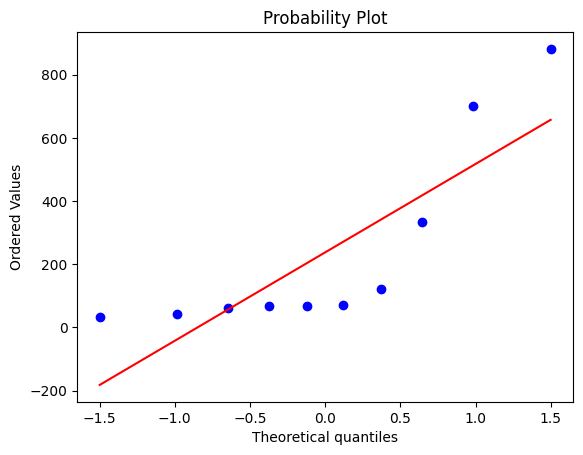

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
stats.probplot(x1, plot = plt)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([  54.1,   62.8,   91.1,  321.9,  354.2,  404.2,  671.6,  882.1,
          919.4, 1024.8])),
 (388.9384414996332, 478.62, 0.9607182463985882))

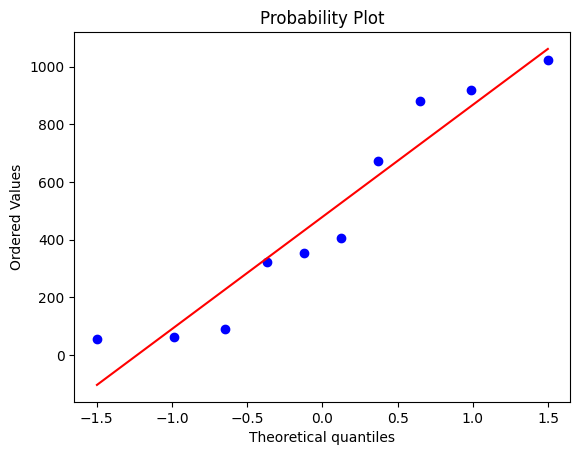

In [ ]:
stats.probplot(x2, plot = plt)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([ 23.6,  26.1,  62.7,  69.7, 108.4, 191.1, 240.8, 242.8, 290.4,
         396.9])),
 (133.3155409866606, 165.25, 0.9668522285193383))

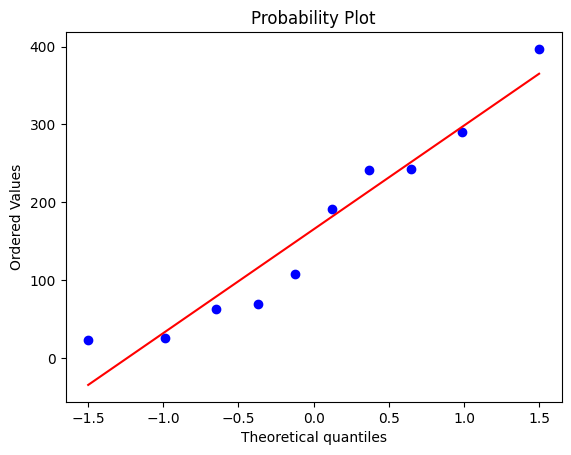

In [ ]:
stats.probplot(x3, plot = plt)

Their linearlities are not very stable and perfect.<br>
We **cannot** just assume it that way.

#### (c)
>Take the logarithm of the raw data. Is there evidence to support the claim that the treatment means differ for the transformed data? 

In [ ]:
data4.12.transformed = read.csv('Problem4.12.csv', header =TRUE)
data4.12.transformed$data = log(data4.12.transformed$data)

In [ ]:
data4.12.transformed

treatment,obsevation,data
<dbl>,<dbl>,<dbl>
1,1,5.812637
1,2,3.453157
1,3,6.552508
1,4,3.718438
1,5,4.114147
1,6,4.242765
1,7,4.212128
1,8,4.198705
1,9,4.793308


In [ ]:
data4.12.transformed.aov = aov(data~factor(treatment)+factor(obsevation), data4.12.transformed)
summary(data4.12.transformed.aov)

                   Df Sum Sq Mean Sq F value Pr(>F)  
factor(treatment)   2  6.297   3.148   3.094  0.070 .
factor(obsevation)  9 14.749   1.639   1.610  0.186  
Residuals          18 18.319   1.018                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Hypothesis Testing：
$$
H_0：\mu_1 = \mu_2 = \mu_3 \quad vs \quad H_1: not\space H_0
$$

Here we find that $$F_0 = 3.094 \quad p\space value = 0.07$$<br>
which is to say that with $\alpha = 0.05$, we can reject null hypothesis.<br><br>
So for the transformed data, we can say that the treatment means differ.

#### (d)
> Analyze the residuals from the transformed data and comment on model adequacy.

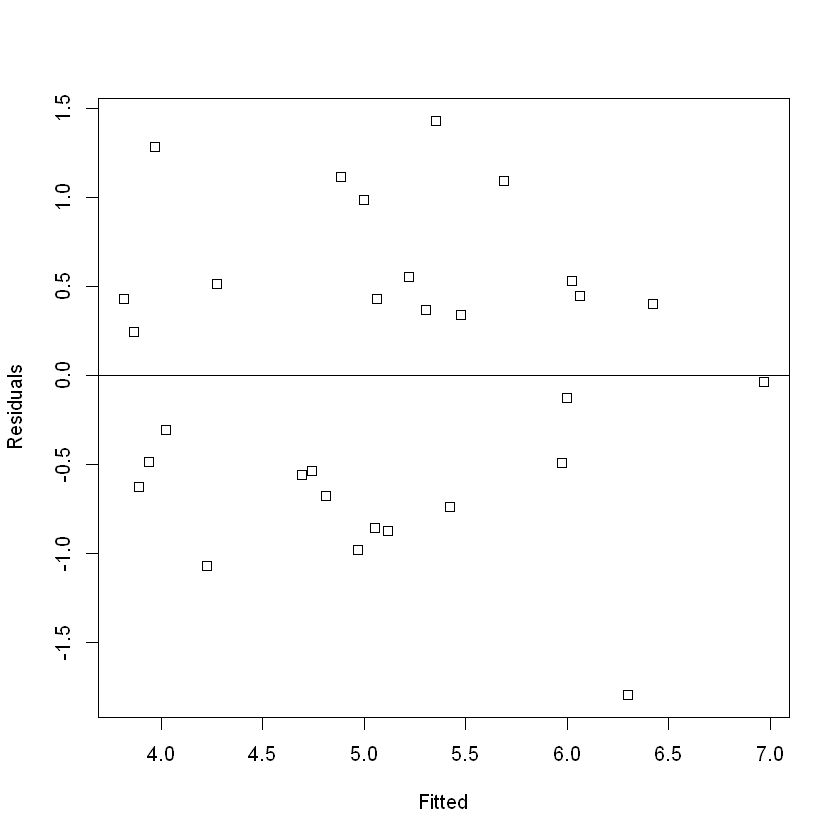

In [ ]:
data4.12.transformed.aov.res = residuals(data4.12.transformed.aov)
data4.12.transformed.aov.fitted = fitted.values(data4.12.transformed.aov)

plot(data4.12.transformed.aov.fitted, data4.12.transformed.aov.res, 
xlab = "Fitted", ylab = "Residuals", pch = 0)
abline(h = 0)

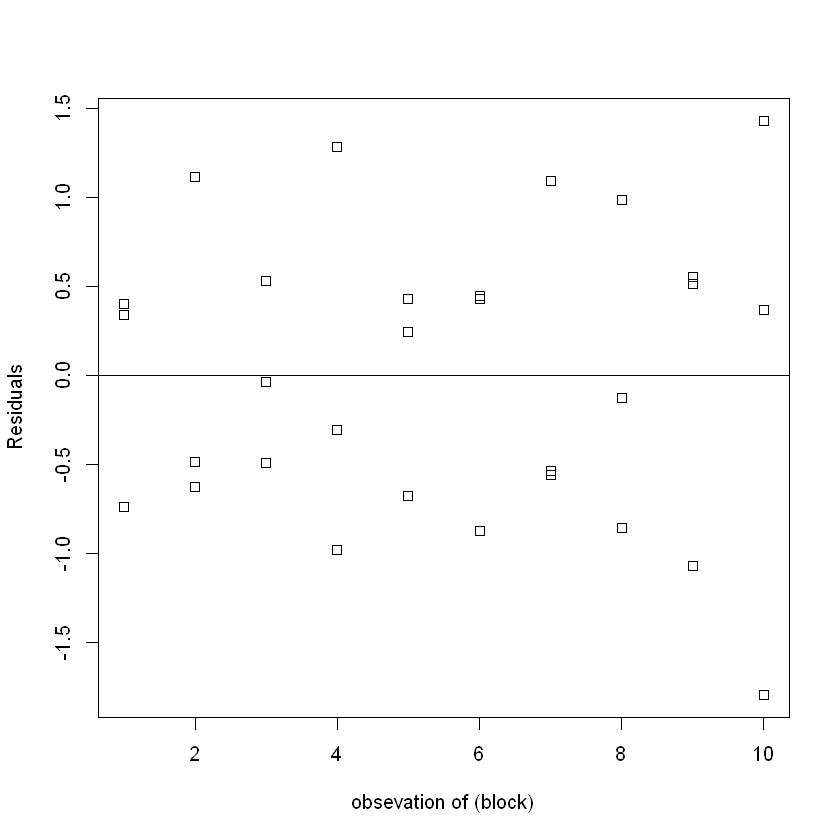

In [ ]:
plot(as.numeric(data4.12.transformed$obsevation), data4.12.transformed.aov.res,
 xlab = "obsevation of (block)", ylab = "Residuals", pch = 0)
abline(h = 0)

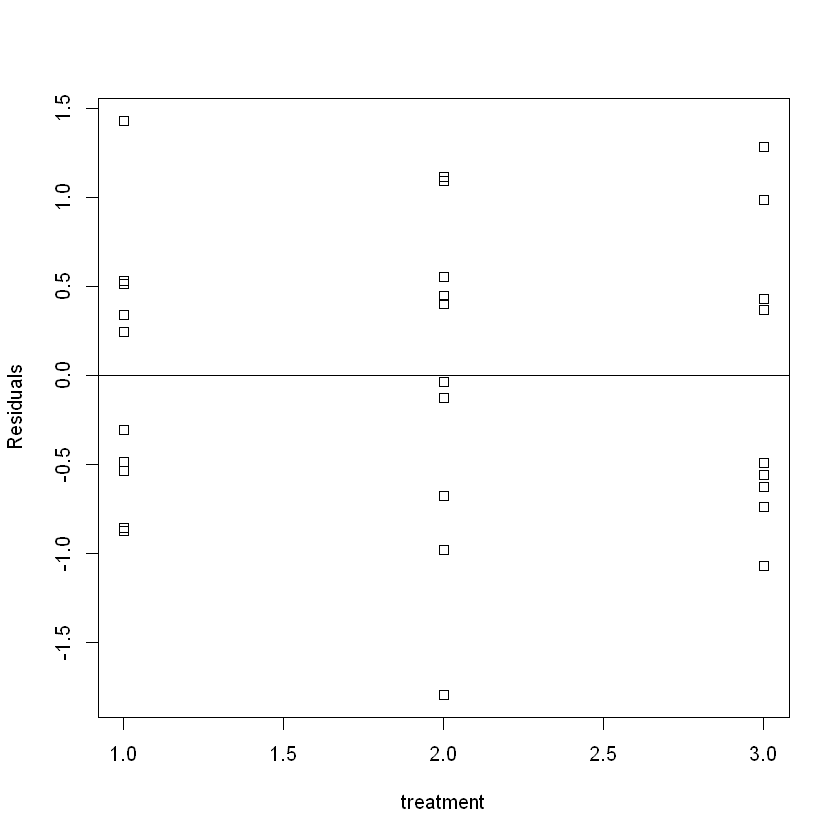

In [ ]:
 plot(as.numeric(data4.12.transformed$treatment), data4.12.transformed.aov.res,
 xlab = "treatment", ylab = "Residuals", pch = 0)
 abline(h = 0)

For we cannot see obvious pattern and outlier in this picture, we can say that the model is **adequate**.

## 4.22
>  The effect of five different ingredients (A,B,C,D,E) on the reaction time of a chemical process is being studied.<br>
 Each batch of new material is only large enough to permit five runs to be made. Furthermore, each run requires approximately $1\frac{1}{2}$ hours, so only five runs can be made in one day. <br>
 The experimenter decides to run the experiment as a Latin square so that day and batch effects may be systematically controlled. <br>
 She obtains the data that follow. Analyze the data from this experiment (use $\alpha=$ 0.05) and draw conclusions.<br>

In [ ]:
data4.22 = data.frame(data=c(8,7,1,7,3,
 11,2,7,3,8,
 4,9,10,1,5,
 6,8,6,6,10,
 4,2,3,8,8),

 ingredient = c('A','B','C','D','E',
 'C','E','A','D','B',
 'B','A','C','E','D',
 'D','C','E','B','A',
 'E','D','B','A','C'), 

 day= rep(c(1:5), 5),

 batch=  c(rep(1, 5), rep(2, 5), rep(3, 5),
 rep(4, 5), rep(5, 5))
)

In [ ]:
data4.22

data,ingredient,day,batch
<dbl>,<chr>,<int>,<dbl>
8,A,1,1
7,B,2,1
1,C,3,1
7,D,4,1
3,E,5,1
11,C,1,2
2,E,2,2
7,A,3,2
3,D,4,2


In [ ]:
data4.22.aov= aov(data~factor(ingredient)+factor(day)+factor(batch), data4.22)
summary(data4.22.aov)

                   Df Sum Sq Mean Sq F value Pr(>F)  
factor(ingredient)  4  91.04  22.760   3.161 0.0544 .
factor(day)         4  13.74   3.436   0.477 0.7521  
factor(batch)       4  15.44   3.860   0.536 0.7121  
Residuals          12  86.42   7.201                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Similarly, the ANOVA support our conclusion that the treatment means differ.

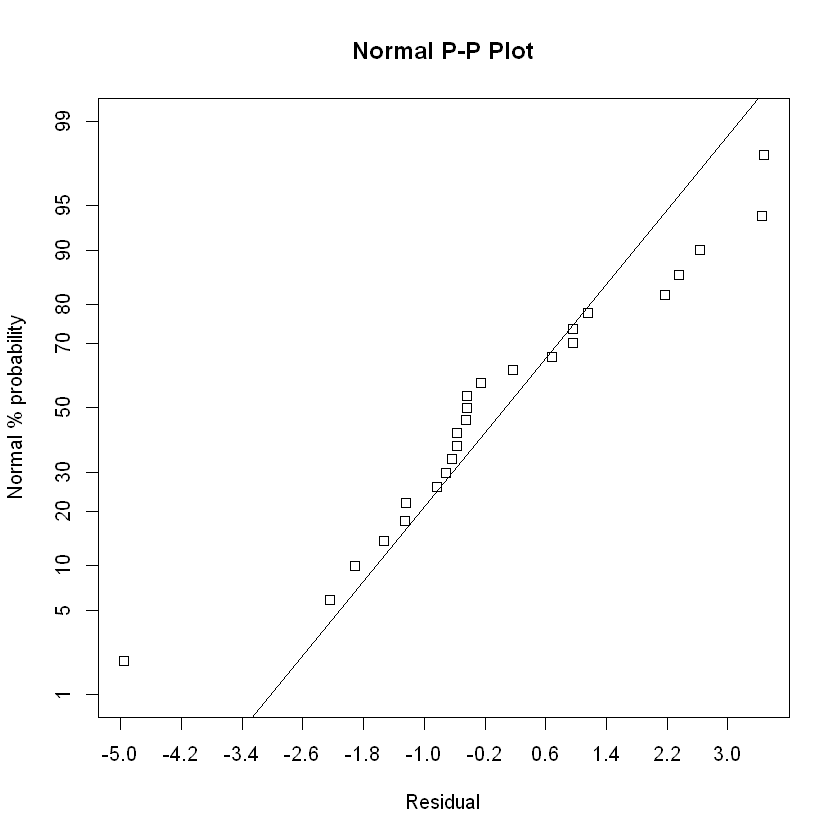

In [ ]:
data4.22.aov.fitted = fitted.values(data4.22.aov)
data4.22.aov.res = residuals(data4.22.aov)

source("PP_plot.R")
 pp.plot(x = data4.22.aov.res, pch = 0, xlab = "Residual",
 line.method = "Q", legend.add = FALSE)


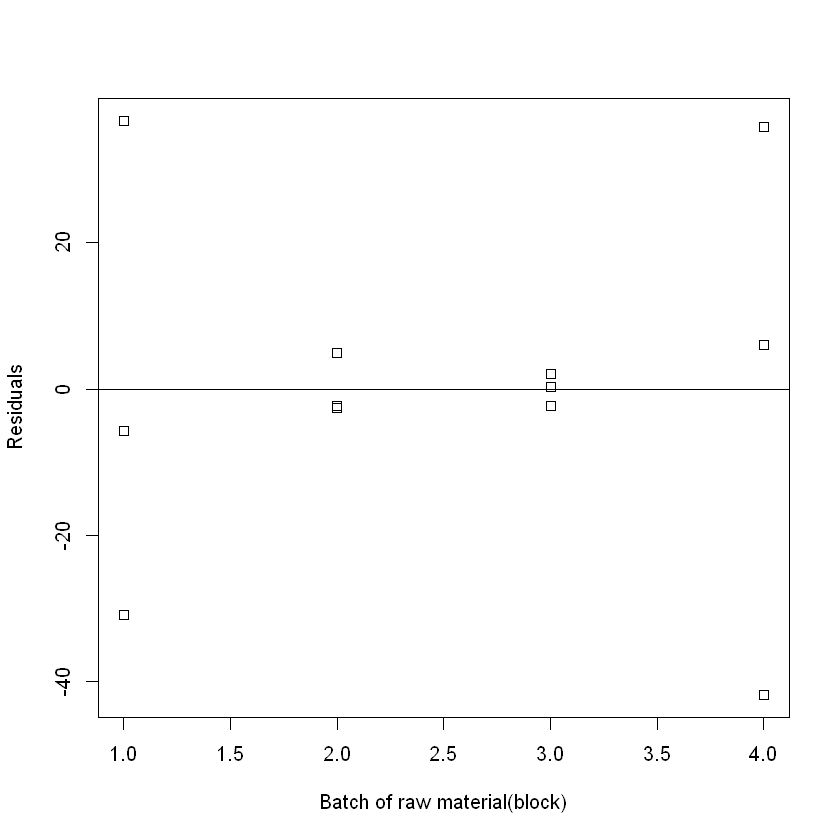

In [ ]:
plot(as.numeric(X$blocks), X_aov_res,
 xlab = "Batch of raw material(block)", ylab = "Residuals", pch = 0)
abline(h = 0)

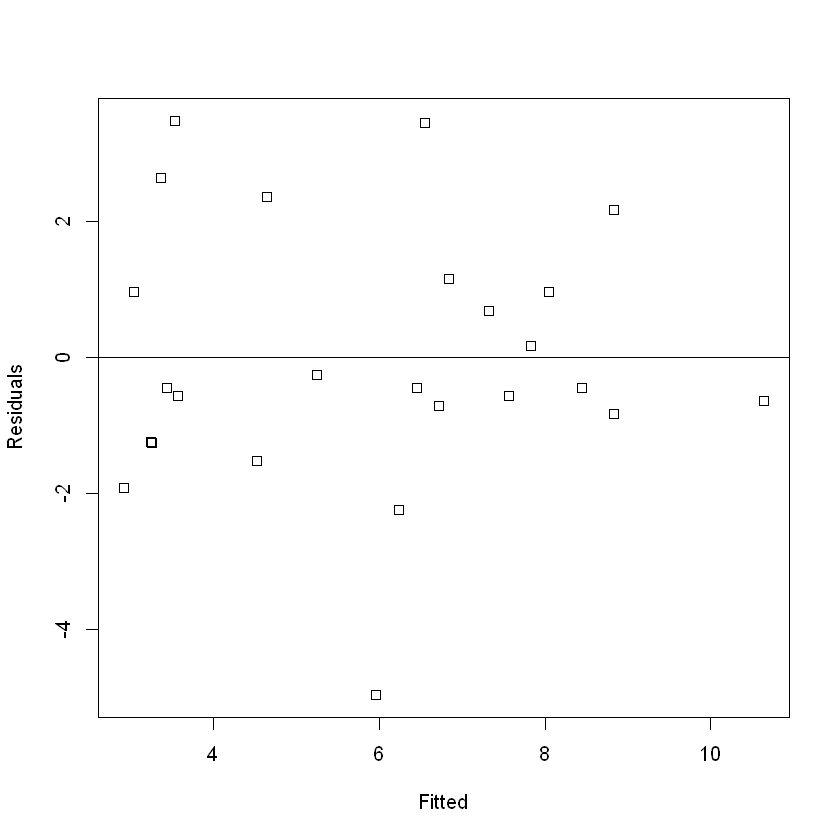

In [ ]:
plot(data4.22.aov.fitted, data4.22.aov.res,
 xlab = "Fitted", ylab = "Residuals", pch = 0)
abline(h = 0)

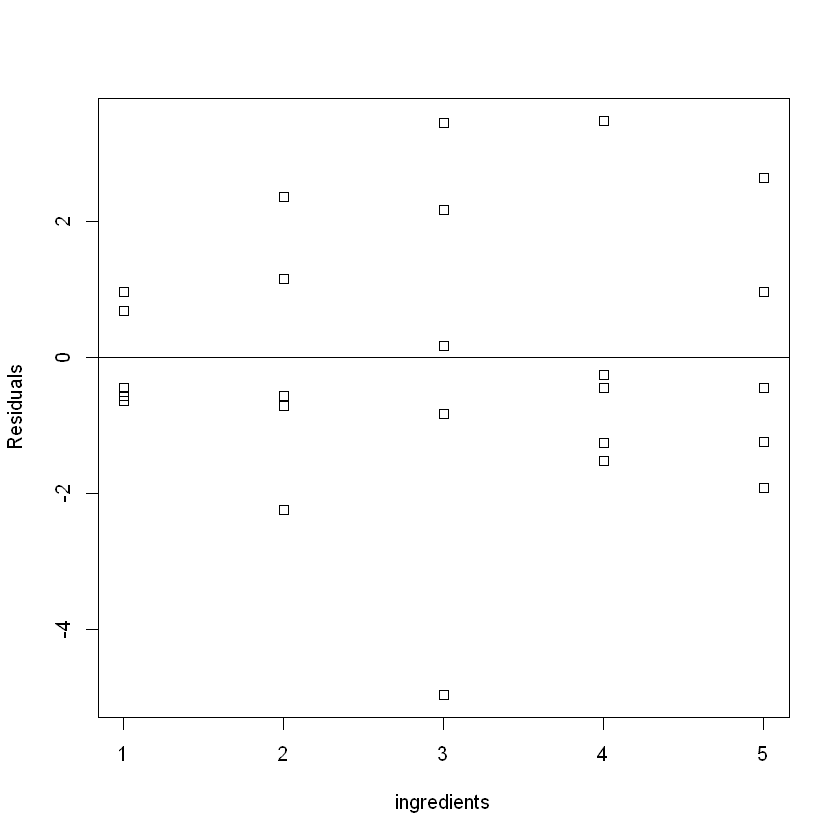

In [ ]:
ingredients = c(1,2,3,4,5,
 3,5,1,4,2,
 2,1,3,5,4,
 4,3,5,2,1,
 5,4,2,1,3)

plot(ingredients, data4.22.aov.res,
 xlab = "ingredients", ylab = "Residuals", pch = 0)
 abline(h = 0)

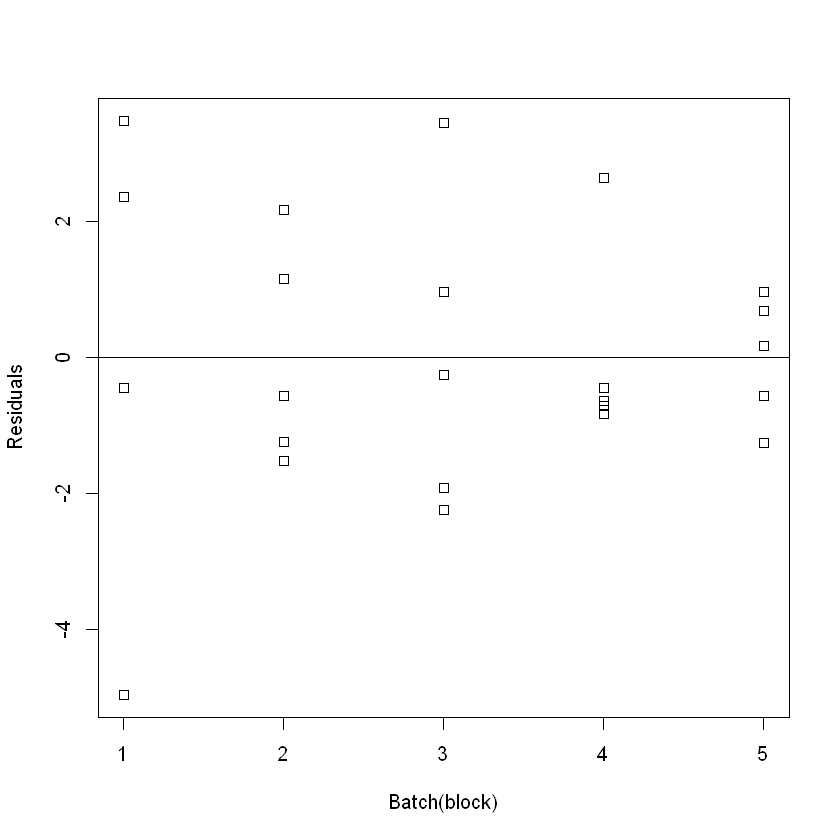

In [ ]:
 plot(as.numeric(data4.22$batch), data4.22.aov.res,
 xlab = "Batch(block)", ylab = "Residuals", pch = 0)
 abline(h = 0)

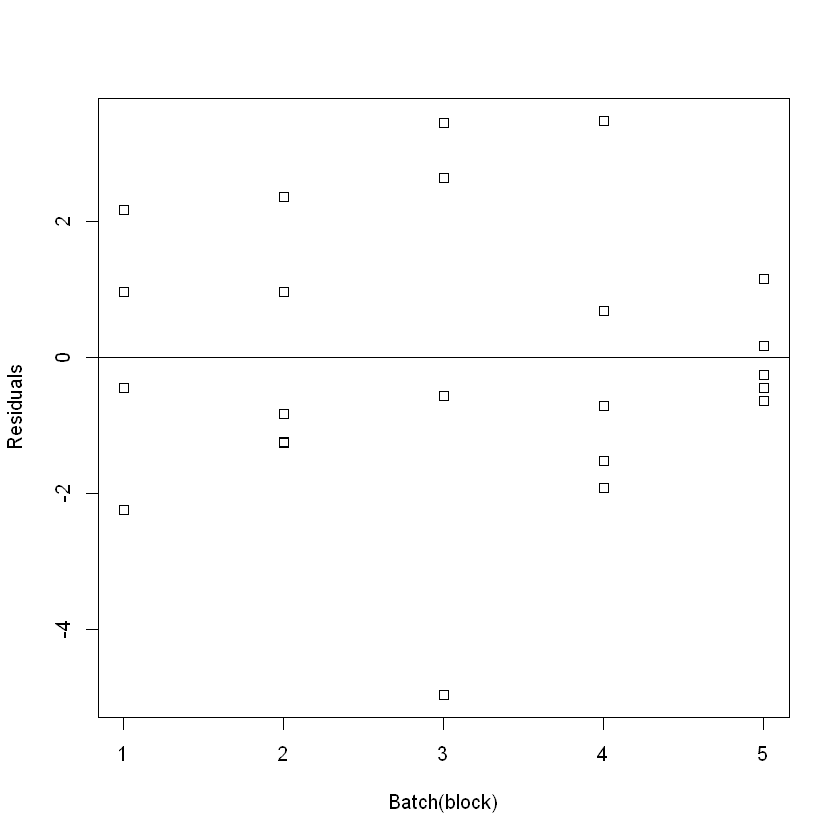

In [ ]:
 plot(as.numeric(data4.22$day), data4.22.aov.res,
 xlab = "Batch(block)", ylab = "Residuals", pch = 0)
 abline(h = 0)

From residual analysis, we can see that the model is **adequate**.<br>
We can conclude that the difference does exist substantailly.